Note: you may need to restart the kernel to use updated packages.
<xarray.Dataset> Size: 36MB
Dimensions:    (time: 139, lat: 180, lon: 360, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1kB 2000-03-16T12:00:00 ... 2011-09-16
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 6kB ...
    clt        (time, lat, lon) float32 36MB ...
Attributes: (12/35)
    institution:            NASA's Jet Propulsion Laboratory, Pasadena, CA 91...
    institute_id:           NASA-GSFC
    experiment_id:          obs
    source:                 MODIS MOD08_M3 Cloud Fraction Mean Mean output pr...
    model_id:               Obs-MODIS
    contact:                Steven A. Ackerman (stevea@ssec.wisc.edu) 

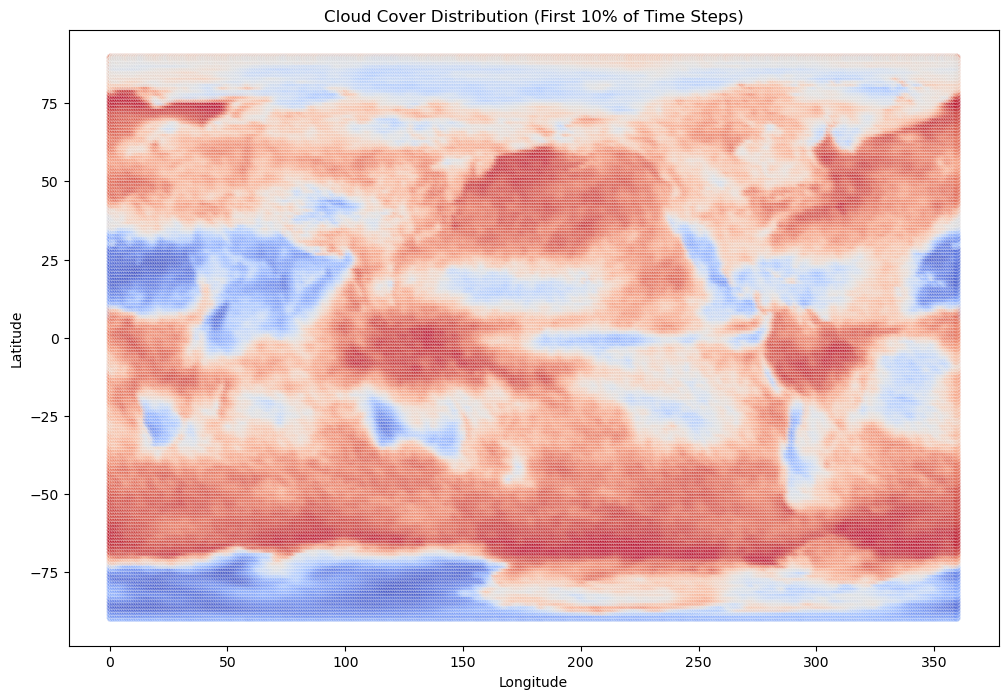

<xarray.Dataset> Size: 496B
Dimensions:    (time: 10, lat: 2, lon: 2, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 80B 2000-03-16T12:00:00 ... 2000-12-16T1...
  * lat        (lat) float64 16B -88.5 -87.5
  * lon        (lon) float64 16B 2.5 3.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 160B ...
    lat_bnds   (lat, bnds) float64 32B ...
    lon_bnds   (lon, bnds) float64 32B ...
    clt        (time, lat, lon) float32 160B 16.42 16.05 13.16 ... 30.7 28.46
Attributes: (12/35)
    institution:            NASA's Jet Propulsion Laboratory, Pasadena, CA 91...
    institute_id:           NASA-GSFC
    experiment_id:          obs
    source:                 MODIS MOD08_M3 Cloud Fraction Mean Mean output pr...
    model_id:               Obs-MODIS
    contact:                Steven A. Ackerman (stevea@ssec.wisc.edu) Steven ...
    ...                     ...
    original_drsFilename:   /work/gleckler1/processed_data/JPL_obs4MI

/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1905: UserWarning: Handling wrapped coordinates with gouraud shading is likely to introduce artifacts. It is recommended to remove the wrap manually before calling pcolormesh.
  warnings.warn("Handling wrapped coordinates with gouraud "


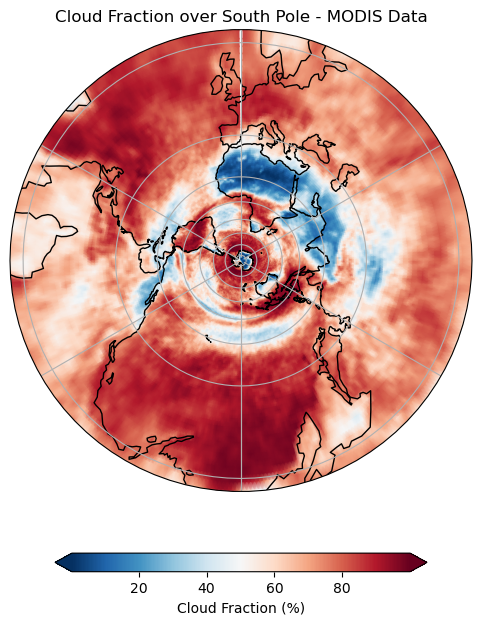

In [2]:
%run CIMP6_1.ipynb

# Dealing with large Data set issue :
## Area Averaging (Spatial Reduction):
Key parameter: 
* Time: Defined by time_bnds, with start/end timestamps for each period.
* Space: A latitude-longitude grid, with boundaries specified by lat_bnds and lon_bnds.
* Data: The clt variable holds the actual measurements (e.g., cloud cover) for each time step and grid cell.
* time_bnds: "March 1, 2025 00:00–March 1, 2025 23:59", "March 2, 2025 00:00–March 2, 2025 23:59", etc.
* lat_bnds: Latitude edges like 89.5°N–88.5°N, 88.5°N–87.5°N, etc.
* lon_bnds: Longitude edges like 179.5°W–178.5°W, 178.5°W–177.5°W, etc.
* clt: Cloud cover percentage (e.g., 75.3%) at each time, latitude, and longitude.
* Longitude spans 360° (from -180° to +180°)
* The Earth’s latitude spans 180° (from -90° to +90°)
* 0, 0 is Null island near England at the Arctic Ocean where prime meridian and equator meet.
* Float 32 (4 bytes per element) has lower precision than float 64(8 byte per elements) but half data.
 ### Tips and steps in area averaging :
1. near the poles, grids (area between to points) will be smaller so  we use projection i cosin.

In [7]:
# filterisation:
ds_arctic = ds.sel(lat=ds.lat >= 60)

In [8]:
# finding missing values 
missing_values = ds_arctic.isnull().sum().values
print(f"Number of NaN values: {missing_values}")

Number of NaN values: <bound method Mapping.values of <xarray.Dataset> Size: 32B
Dimensions:    ()
Data variables:
    time_bnds  int64 8B 0
    lat_bnds   int64 8B 0
    lon_bnds   int64 8B 0
    clt        int64 8B 0>


In [12]:
# Count zero values
zero_values = (ds_arctic == 0).sum().values
print(f"Number of zero values: {zero_values}")

Number of zero values: <bound method Mapping.values of <xarray.Dataset> Size: 32B
Dimensions:    ()
Data variables:
    time_bnds  int64 8B 0
    lat_bnds   int64 8B 0
    lon_bnds   int64 8B 1
    clt        int64 8B 0>


In [13]:
# Check for infinite values
inf_values = np.isinf(ds_arctic).sum().values
print(f"Number of infinite values: {inf_values}")

Number of infinite values: <bound method Mapping.values of <xarray.Dataset> Size: 32B
Dimensions:    ()
Data variables:
    time_bnds  int64 8B 0
    lat_bnds   int64 8B 0
    lon_bnds   int64 8B 0
    clt        int64 8B 0>


In [14]:
print(f"""
Missing values (NaN): {missing_values}
Zero values: {zero_values}
Infinite values: {inf_values}
""")


Missing values (NaN): <bound method Mapping.values of <xarray.Dataset> Size: 32B
Dimensions:    ()
Data variables:
    time_bnds  int64 8B 0
    lat_bnds   int64 8B 0
    lon_bnds   int64 8B 0
    clt        int64 8B 0>
Zero values: <bound method Mapping.values of <xarray.Dataset> Size: 32B
Dimensions:    ()
Data variables:
    time_bnds  int64 8B 0
    lat_bnds   int64 8B 0
    lon_bnds   int64 8B 1
    clt        int64 8B 0>
Infinite values: <bound method Mapping.values of <xarray.Dataset> Size: 32B
Dimensions:    ()
Data variables:
    time_bnds  int64 8B 0
    lat_bnds   int64 8B 0
    lon_bnds   int64 8B 0
    clt        int64 8B 0>



1. clt (cloud cover) data is clean, with no missing or extreme values.
2. potential issue is one zero in lon_bnds, but this is likely just a coordinate boundary and not a data issue.

### Spatial downsampling (Area averaging):
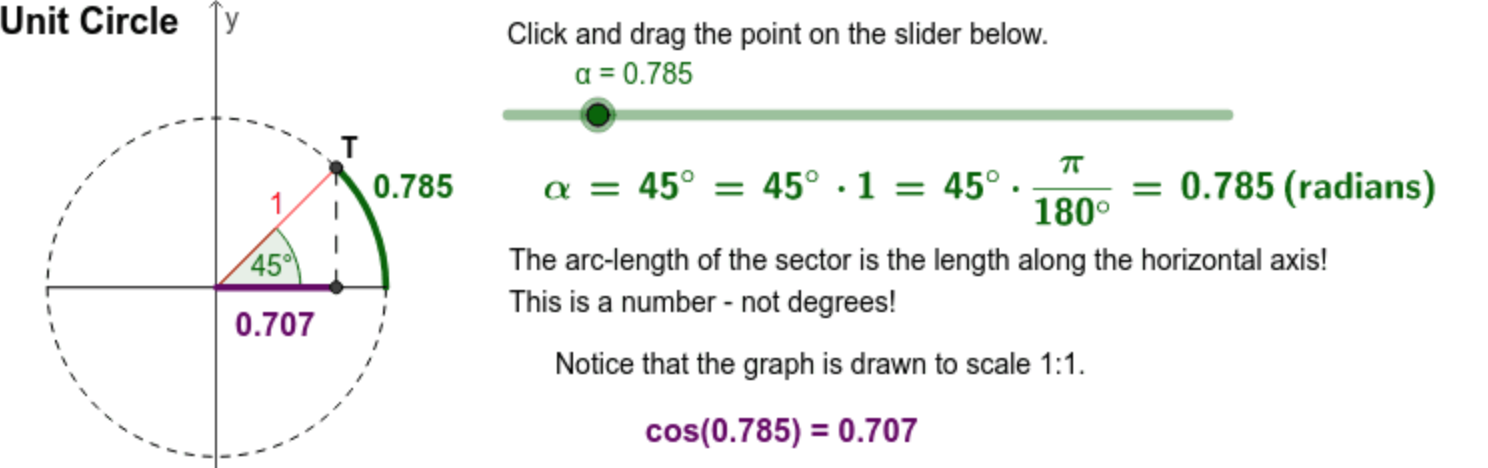

In [15]:
# Convert latitude to radians for cosine weighting
weights = np.cos(np.deg2rad(ds_arctic.lat))

# Normalize weights so they sum to 1
weights /= weights.sum()
# Compute weighted mean over lat and lon
arctic_mean = (ds_arctic["clt"] * weights).mean(dim=["lat", "lon"])
#The weighted mean ensures proper representation of each latitude band.
#This reduces a 3D dataset (lat, lon, time) to a 1D time series.

In [16]:
print(arctic_mean)

<xarray.DataArray (time: 139)> Size: 1kB
array([2.45434278, 2.26734443, 2.37225669, 2.39046601, 2.39883942,
       2.5071885 , 2.71267781, 2.65979912, 2.40827232, 2.18141796,
       2.28963579, 2.24016133, 2.07105317, 2.11785791, 2.33548342,
       2.36102888, 2.35711186, 2.47618692, 2.51019884, 2.55562076,
       2.35706167, 2.2453281 , 2.06536249, 2.21169022, 2.07365402,
       1.99989294, 2.29712112, 2.37571951, 2.43979757, 2.53241628,
       2.59593313, 2.46382376, 2.32616563, 2.41639083, 2.36853338,
       2.36154997, 2.32357366, 2.18180943, 2.41708622, 2.46899421,
       2.31347791, 2.53321385, 2.55314876, 2.50929925, 2.44282508,
       2.36349131, 2.06258181, 2.05915485, 2.25741144, 2.02112168,
       2.41379657, 2.34291347, 2.3918224 , 2.5528646 , 2.59792614,
       2.5794999 , 2.45623625, 2.43455354, 2.37854072, 2.23245059,
       2.15284984, 1.92164972, 2.25711481, 2.28479116, 2.43334818,
       2.52114797, 2.50731867, 2.53620402, 2.42690764, 2.28149311,
       2.27143101, 2.

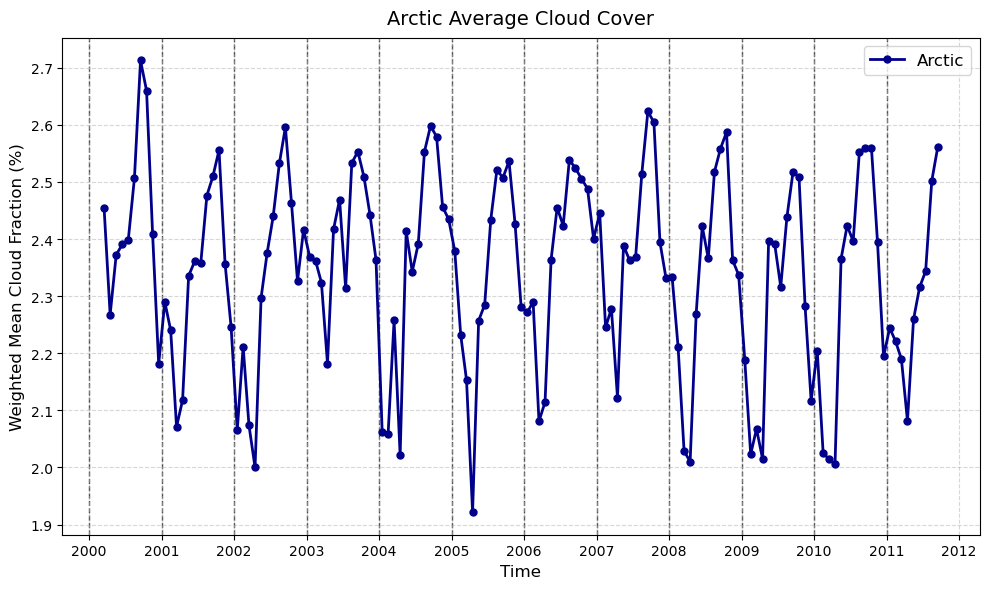

In [68]:
from matplotlib.dates import YearLocator, DateFormatter
# Create a single figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Arctic data
arctic_mean.plot(ax=ax, color="darkblue", linewidth=2, marker="o", markersize=5, label="Arctic")


# Customize the plot
ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("Weighted Mean Cloud Fraction (%)", fontsize=12)
ax.set_title("Arctic Average Cloud Cover", fontsize=14, pad=10)
ax.grid(True, linestyle="--", alpha=0.5)
ax.tick_params(axis="both", labelsize=10)


# Set yearly ticks on x-axis
ax.xaxis.set_major_locator(YearLocator())  # Yearly ticks
ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Show year only

# Add red vertical dashed lines at the start of each year
years = arctic_mean.time.dt.year.values
unique_years = np.unique(years)
for year in unique_years:
    ax.axvline(x=np.datetime64(f"{year}-01-01"), color="black", linestyle="--", 
               linewidth=1, alpha=0.7, zorder=1)  # Behind plot line


# Add a legend
ax.legend(fontsize=12)

# Adjust layout and save
plt.tight_layout() 
plt.show()